<a href="https://colab.research.google.com/github/fettahyildizz/USA_Housing_Linear_Regression/blob/main/USA_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [48]:
df = pd.read_csv('USA_Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


We need price as output, we set it as train_labels.
We need the other numerical values as inputs, we set them as train_dataset. 
We exclude 'Price' and 'Address' columns.

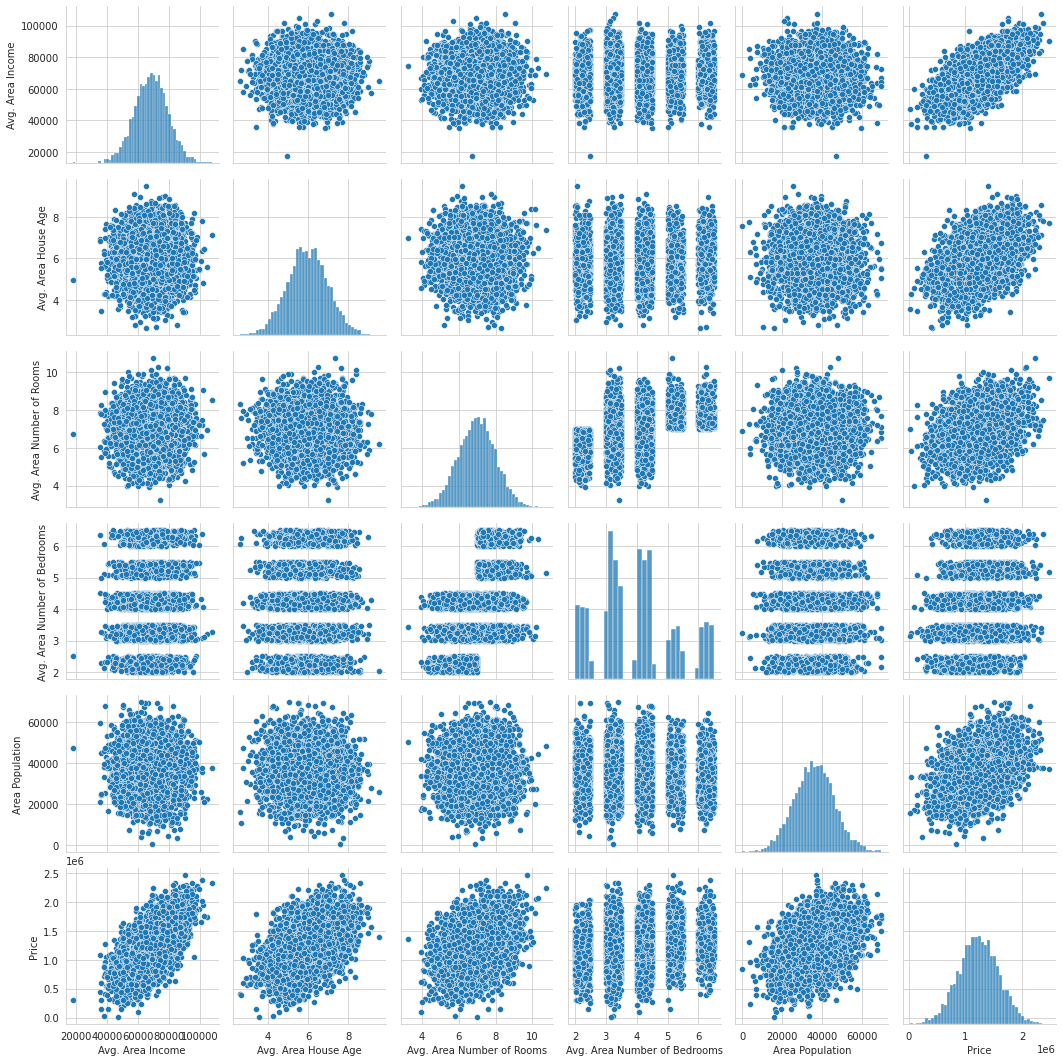

In [58]:
sns.pairplot(df)

In [59]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


The biggest correlation with price is Avg. Area Income.

In [49]:
train_dataset = df.sample(frac = 0.85, random_state = 101)
test_dataset = df.drop(train_dataset.index)

train_labels = train_dataset['Price']
test_labels = test_dataset['Price']


train_dataset = train_dataset.drop(['Price', 'Address'],axis=1)
test_dataset = test_dataset.drop(['Price', 'Address'],axis=1)

test_dataset.tail()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4972,83695.272383,7.643507,7.127219,5.05,33113.759057
4977,75980.438843,6.583105,5.914892,3.23,40394.593489
4984,62623.359828,5.071624,6.771015,3.33,50985.971202
4994,73060.846226,5.293682,6.312253,4.16,22695.695480
4999,65510.581804,5.992305,6.792336,4.07,46501.283803


In [50]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers.experimental.preprocessing import Normalization


In [51]:
normalizer = Normalization()
normalizer.adapt(np.array(train_dataset))



In [ ]:
model2 = keras.Sequential([
                          normalizer,
                          Dense(128,activation='relu'),
                          Dense(128,activation='relu'),
                          Dense(1)
])
model2.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='mean_squared_error')
model2.fit(train_dataset,train_labels,epochs=200,validation_split=0.15)

In [57]:
model2.evaluate(test_dataset,test_labels)

24/24 [==============================] - 0s 1ms/step - loss: 9313086464.0000


9313086464.0

In [ ]:
x = tf.linspace(0.0,250,251)
y = model2.predict(x)